## Assignment 4

#### Name : Raswanth S.R
#### RollNum : CB.EN.U4CSE19648

### SLR Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("C:/Users/RASWANTH.SR/Desktop/ML Lab/FDS Lab/csv/Insurance.xls")

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [3]:
df

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


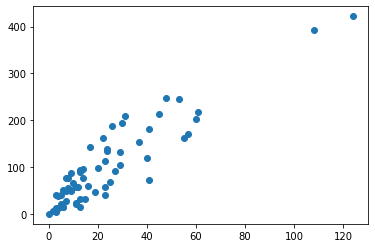

In [4]:
plt.scatter(df['X'],df['Y'])

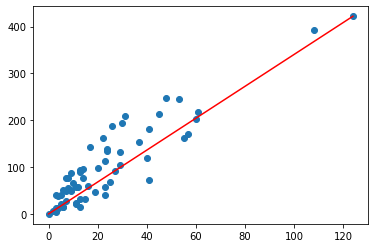

In [5]:
plt.scatter(df['X'],df['Y'])
plt.plot([min(df['X']),max(df['X'])],[min(df['Y']),max(df['Y'])],color='red')
plt.show()

In [11]:
def mean(values):
    return sum(values)/float(len(values))

In [12]:
def variance(values,mean):
    return sum([(x-mean)**2 for x in values])

In [13]:
dataset = [[1,1],[2,3],[3,2],[4,5]]

In [22]:
x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
mean_x,mean_y = mean(x),mean(y)
var_x,var_y = variance(x,mean_x),variance(y,mean_y)
print('xstats: ',mean_x,",",var_x)
print('ystats: ',mean_y,",",var_y)

xstats:  2.5 , 5.0
ystats:  2.75 , 8.75


In [15]:
def covariance(x,mean_x,y,mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i]-mean_x)*(y[i]-mean_y)
    return covar

In [16]:
x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
mean_x,mean_y = mean(x),mean(y)
covar = covariance(x,mean_x,y,mean_y)
print('covariance : ',covar)

covariance :  5.5


In [19]:
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    mean_x,mean_y = mean(x),mean(y)
    b1 = covariance(x,mean_x,y,mean_y)
    b0 = mean_y - b1*mean_x
    return [b0,b1]

In [21]:
b0,b1 = coefficients(dataset)
print('Coefficients :',b0,",",b1)

Coefficients : -11.0 , 5.5


In [23]:
def simple_linear_regression(train,test):
    predictions = list()
    b0,b1 = coefficients(train)
    print("parameters estimated using OLS:")
    print("b0:",b0,"b1:",b1)
    for row in test:
        yhat = b0 + b0*row[0]
        predictions.append(yhat)
    return predictions

In [24]:
# Standalone example
from math import sqrt

In [30]:
def rmse_metric(actual,predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error =  sum_error / float(len(actual))
    return sqrt(mean_error)

In [36]:
def evaluate_algorithm(dataset,algorithm):
    test_set = list()
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(dataset,test_set)
    actual = [row[-1] for row in dataset]
    rmse = rmse_metric(actual,predicted)
    return rmse,predicted

In [37]:
dataset = [[1,1],[2,3],[4,3],[3,2]]
y_pred = []
rmse , y_pred = evaluate_algorithm(dataset,simple_linear_regression)
print('RMSE : %3f ' %(rmse))
print(y_pred)

parameters estimated using OLS:
b0: -4.0 b1: 2.5
RMSE : 17.022045 
[-8.0, -12.0, -20.0, -16.0]


In [53]:
# Insurance prediction
data = df.values
data

array([[108. , 392.5],
       [ 19. ,  46.2],
       [ 13. ,  15.7],
       [124. , 422.2],
       [ 40. , 119.4],
       [ 57. , 170.9],
       [ 23. ,  56.9],
       [ 14. ,  77.5],
       [ 45. , 214. ],
       [ 10. ,  65.3],
       [  5. ,  20.9],
       [ 48. , 248.1],
       [ 11. ,  23.5],
       [ 23. ,  39.6],
       [  7. ,  48.8],
       [  2. ,   6.6],
       [ 24. , 134.9],
       [  6. ,  50.9],
       [  3. ,   4.4],
       [ 23. , 113. ],
       [  6. ,  14.8],
       [  9. ,  48.7],
       [  9. ,  52.1],
       [  3. ,  13.2],
       [ 29. , 103.9],
       [  7. ,  77.5],
       [  4. ,  11.8],
       [ 20. ,  98.1],
       [  7. ,  27.9],
       [  4. ,  38.1],
       [  0. ,   0. ],
       [ 25. ,  69.2],
       [  6. ,  14.6],
       [  5. ,  40.3],
       [ 22. , 161.5],
       [ 11. ,  57.2],
       [ 61. , 217.6],
       [ 12. ,  58.1],
       [  4. ,  12.6],
       [ 16. ,  59.6],
       [ 13. ,  89.9],
       [ 60. , 202.4],
       [ 41. , 181.3],
       [ 37

In [54]:
y_pred = []
rmse , y_pred = evaluate_algorithm(data,simple_linear_regression)
print('RMSE : %3f ' %(rmse))
print(y_pred)

parameters estimated using OLS:
b0: -2643556.2342403634 b1: 115419.42380952384
RMSE : 87998995.978812 
[-288147629.5321996, -52871124.68480726, -37009787.279365085, -330444529.2800454, -108385805.60385491, -153326261.58594108, -63445349.62176872, -39653343.513605446, -121603586.77505672, -29079118.576644, -15861337.405442182, -129534255.47777781, -31722674.81088436, -63445349.62176872, -21148449.873922907, -7930668.70272109, -66088905.85600908, -18504893.639682543, -10574224.936961453, -63445349.62176872, -18504893.639682543, -26435562.342403635, -26435562.342403635, -10574224.936961453, -79306687.0272109, -21148449.873922907, -13217781.171201818, -55514680.91904763, -21148449.873922907, -13217781.171201818, -2643556.2342403634, -68732462.09024945, -18504893.639682543, -15861337.405442182, -60801793.38752835, -31722674.81088436, -163900486.52290252, -34366231.045124725, -13217781.171201818, -44940455.982086174, -37009787.279365085, -161256930.28866217, -111029361.83809526, -100455136.9

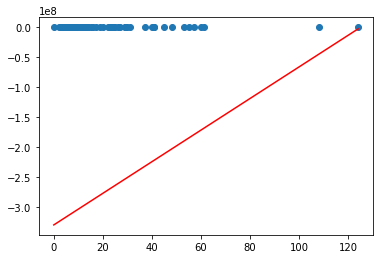

In [52]:
plt.scatter(df['X'],df['Y'])
plt.plot([min(df['X']),max(df['X'])],[min(y_pred),max(y_pred)],color='red')
plt.show()

In [56]:
# Gradient Descent Estimation
def Gradient_Descent(X,y,b1_current =0,b0_current=0,epochs=1000,learning_rate =0.0001):
    N = float(len(y))
    for i in range(epochs):
        y_current = (b1_current *X) + b0_current
        b1_gradient = -(2/N) * sum(X*(y-y_current))
        b0_gradient = -(2/N) * sum(y-y_current)
        b1_current = b1_current - (learning_rate * b1_gradient)
        b0_current = b0_current - (learning_rate * b0_gradient)
    return b0_current,b1_current

In [58]:
b0,b1 = Gradient_Descent(df['X'],df['Y'])
print("b0:",b0,"b1:",b1)

b0: 1.9974788477880756 b1: 3.802421618624299


In [59]:
predictions =[]
for x in df['X']:
    yp = b0 +b1*x
    predictions.append(yp)
print(predictions)

[412.6590136592124, 74.24348960164976, 51.428959889903965, 473.4977595572012, 154.09434359276005, 218.73551110937314, 89.45317607614696, 55.23138150852826, 173.10645168588152, 40.02169503403107, 21.009586940909575, 184.51371654175443, 43.82411665265536, 89.45317607614696, 28.61443017815817, 9.602322085036674, 93.25559769477125, 24.812008559533872, 13.404743703660973, 89.45317607614696, 24.812008559533872, 36.21927341540677, 36.21927341540677, 13.404743703660973, 112.26770578789275, 28.61443017815817, 17.207165322285274, 78.04591122027406, 28.61443017815817, 17.207165322285274, 1.9974788477880756, 97.05801931339555, 24.812008559533872, 21.009586940909575, 85.65075445752265, 43.82411665265536, 233.9451975838703, 47.626538271279664, 17.207165322285274, 62.83622474577686, 51.428959889903965, 230.14277596524602, 157.89676521138435, 142.68707873688714, 211.13066787212452, 157.89676521138435, 43.82411665265536, 104.66286255064415, 32.41685179678247, 13.404743703660973, 66.63864636440115, 51.4

In [62]:
rmse = rmse_metric(df['Y'],predictions)
print('RMSE : %3f ' %(rmse))

RMSE : 37.610155 


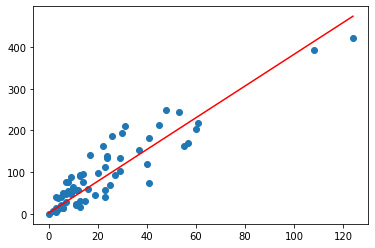

In [63]:
plt.scatter(df['X'],df['Y'])
plt.plot([min(df['X']),max(df['X'])],[min(predictions),max(predictions)],color='red')
plt.show()